In [3]:
import pandas as pd
df = pd.read_csv('spam.csv', encoding='latin1')


In [4]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)


In [6]:
df.head(5)
df.shape

(5572, 2)

In [7]:
df['v2'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import  train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.naive_bayes import MultinomialNB

**Exploratory Data Analysis (EDA)**

In [9]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
#Extract SPAM Message 
spam_messages=df[df["v1"]=="spam"]
spam_messages.head() #display first 5 rows  of SPAM messages 

,v1,v2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [11]:
#Find count and uniques messege count of Spam messege
spam_messages.describe()

,v1,v2
count,747,747
unique,1,653
top,spam,Please call our customer service representativ...
freq,747,4


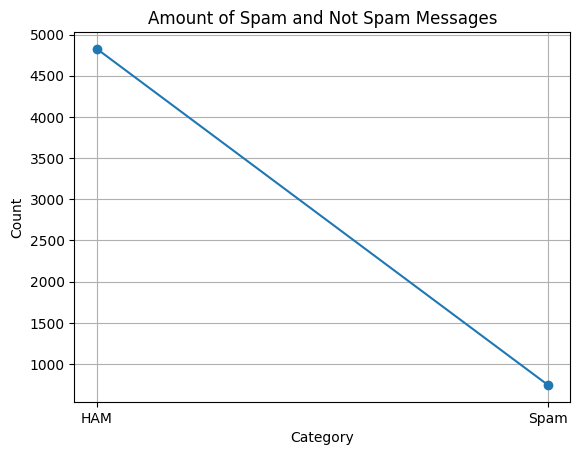

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df contains your DataFrame with a column 'v1' indicating 'HAM' or 'Spam'
# Count the occurrences of 'HAM' and 'Spam'
spam_counts = df[df['v1'] == 'spam'].shape[0]
ham_counts = df[df['v1'] == 'ham'].shape[0]

# Plotting
plt.plot(['HAM', 'Spam'], [ham_counts, spam_counts], marker='o')
plt.title('Amount of Spam and Not Spam Messages')
plt.xlabel('Category')
plt.ylabel('Count')
plt.grid(True)
plt.show()


In [13]:
# Assuming df contains your DataFrame with a column 'v1' indicating 'ham' or 'spam'
#Method :-1
spam_count = df['v1'].value_counts()['spam']
not_spam_count = df['v1'].value_counts()['ham']
# Method:- 2
spam=0
not_spam=0
for labels in df['v1']:
    if labels=='spam':
        spam=spam+1
    else:
        not_spam=not_spam+1

print("Total number of spam messages:", spam_count)
print("Total number of not spam messages:", not_spam)


Total number of spam messages: 747
Total number of not spam messages: 4825


In [14]:
# average  numeber of length words, sentense and text of each descrpition
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

# Assuming df contains your DataFrame with a column 'description' containing text descriptions

# Tokenize words and sentences
nltk.download('punkt')

word_lengths = []
sentence_lengths = []
text_lengths = []

for text in df['v2']:
    words = word_tokenize(text)
    sentences = sent_tokenize(text)
    
    # Calculate lengths
    word_lengths.append(len(words))
    sentence_lengths.append(len(sentences))
    text_lengths.append(len(text))

# Calculate averages
average_word_length = sum(word_lengths) / len(word_lengths)
average_sentence_length = sum(sentence_lengths) / len(sentence_lengths)
average_text_length = sum(text_lengths) / len(text_lengths)

print("Average number of words per description:", average_word_length)
print("Average number of sentences per description:", average_sentence_length)
print("Average number of characters per description:", average_text_length)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Average number of words per description: 18.699389806173727
Average number of sentences per description: 1.996410624551328
Average number of characters per description: 80.11880832735105


In [15]:
#Count the number of words , sentnces and text in each descrpition

# Assuming df contains your DataFrame with a column 'description' containing text descriptions

word_counts = []
sentence_counts = []
character_counts = []

for text in df['v2']:
    words = word_tokenize(text)
    sentences = sent_tokenize(text)
    
    # Count lengths
    word_counts.append(len(words))
    sentence_counts.append(len(sentences))
    character_counts.append(len(text))

# Add the counts to the DataFrame
df['word_count'] = word_counts
df['sentence_count'] = sentence_counts
df['character_count'] = character_counts

print(df[['word_count', 'sentence_count', 'character_count']])


      word_count  sentence_count  character_count
0             24               2              111
1              8               2               29
2             37               2              155
3             13               1               49
4             15               1               61
...          ...             ...              ...
5567          35               4              161
5568           9               1               37
5569          15               2               57
5570          27               1              125
5571           7               2               26

[5572 rows x 3 columns]


In [26]:
data_train, data_test, label_train, label_test=train_test_split(df.v2, df.v1, test_size=0.25, random_state=0)
print(f"The train Data is", data_train.shape, label_train.shape)
print(f"The test data is ",data_test.shape, label_test.shape)

The train Data is (4179,) (4179,)
The test data is  (1393,) (1393,)


**Extraction and Vectorization->
The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.**


In [27]:
vectorizer=CountVectorizer()
#fit & transform
# fit: build dict (i.e. word->wordID)  
# transform: convert document (i.e. each line in the file) to word vector 
data_train_count = vectorizer.fit_transform(data_train)
data_test_count  = vectorizer.transform(data_test)

**Modelling and Traning**

**Multinomial Naive Bayes is a specialized version of Naive Bayes that is designed more for text documents. Whereas simple naive Bayes would model a document as the presence and absence of particular words, multinomial naive bayes explicitly models the word counts and adjusts the underlying calculations to deal with in.
It is a classification technique based on Bayes' Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.**

In [29]:
clf = MultinomialNB()
clf.fit(data_train_count, label_train)
predictions = clf.predict(data_test_count)
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'spam'], dtype='<U4')

**REsults and acuracy**

In [35]:
print ("accuracy_score : ", accuracy_score(label_test, predictions))


accuracy_score :  0.9863603732950467


**Confusion Matrix**

In [36]:
#A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.

In [38]:
print ("confusion_matrix : \n", confusion_matrix(label_test, predictions))


confusion_matrix : 
 [[1193    3]
 [  16  181]]


In [39]:
print (classification_report(label_test, predictions))


              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1196
        spam       0.98      0.92      0.95       197

    accuracy                           0.99      1393
   macro avg       0.99      0.96      0.97      1393
weighted avg       0.99      0.99      0.99      1393

